In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw = pd.read_excel('PreMP_sonar_Tx_AVG_FindLSL_2.xlsx').astype({'SerialNumber':'category'})

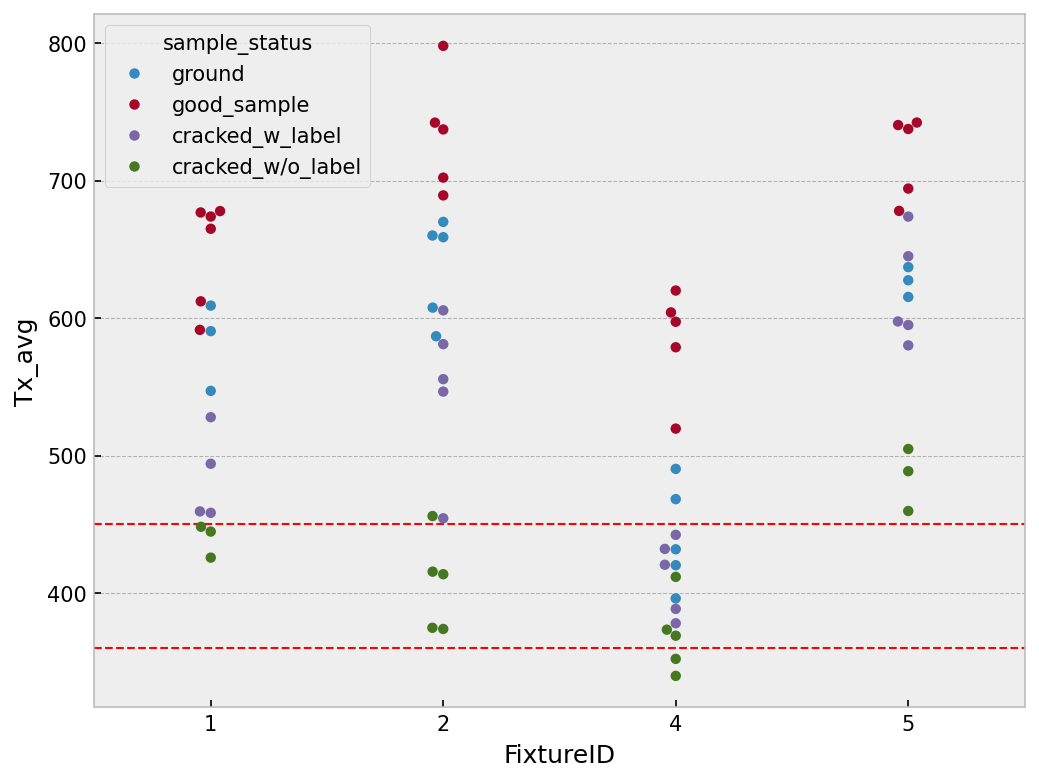

In [55]:
plt.style.use('bmh')
plt.figure(dpi=150,figsize=(8, 6))
sns.swarmplot(data=raw, x='FixtureID', y='Tx_avg', hue='sample_status')
plt.axhline(y=450, color='red', ls='--', lw=1)
plt.axhline(y=360, color='red', ls='--', lw=1)

In [47]:
(raw
 .assign(sigma = raw.groupby(['sample_status','FixtureID']).Tx_avg.transform('std').round(3))
#  .query("sample_status == 'good_sample'")
 .groupby(['FixtureID','sample_status'])
 [['sigma']]
 .mean()
 .unstack(['sample_status'])
 ['sigma']
 )

sample_status,cracked_w/o_label,cracked_w_label,good_sample,ground
FixtureID,,,,
1,12.070,33.102,37.807,31.837
2,34.126,57.518,42.394,37.015
4,27.331,27.864,38.899,37.779
5,22.843,39.449,30.156,10.861
